# Time Series Analysis: Tutorial 1

## Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('text', usetex=True)
import pandas as pd
import statsmodels.api as sm

## Data

In [5]:
#Load the Stata-file into a dataframe. It is a data file with US population values from 1780 to 1990
#in 10-year steps.
series=pd.read_stata('/home/nudse/Dokumente/Uni/Arbeit TU Berlin/TSA WS 2021/Tutorials/Tutorial 1/USpop.dta')
series=series.drop([21,22])
series_relativechange=100*series.pct_change()
time = pd.date_range(start="1780", end="1990", closed="left", freq="10Y")
data = pd.DataFrame(time, columns=['date'])
ts=data.assign(pop=series.values,pop_relative=series_relativechange.values)
ts

,date,pop,pop_relative
0,1780-12-31,3.929214,NaN
1,1790-12-31,5.308483,35.102924
2,1800-12-31,7.239881,36.383238
3,1810-12-31,9.638453,33.129992
4,1820-12-31,12.860702,33.431184
5,1830-12-31,17.063353,32.678239
6,1840-12-31,23.191876,35.916288
7,1850-12-31,31.443321,35.579032
8,1860-12-31,38.558371,22.628176
9,1870-12-31,50.189209,30.164236


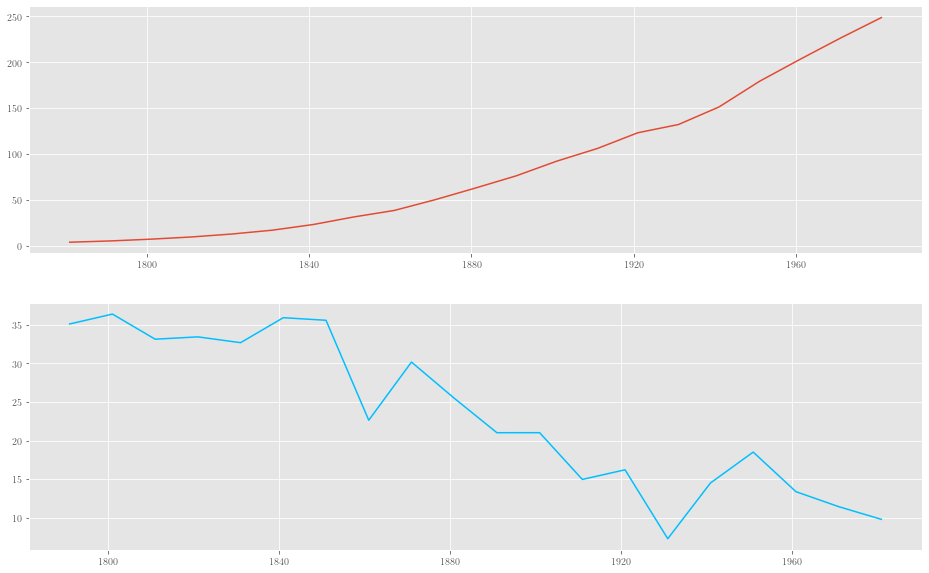

In [6]:
#Plot both series with matplotlib.
fig, ax=plt.subplots(2,1,figsize=(16,10))
ax[0].plot(ts['date'],ts['pop'])
ax[1].plot(ts['date'],ts['pop_relative'],c="deepskyblue")

## Deterministic Trend

Which deterministic trend model seems appropiate to model the pattern of the curve?

## Linear Trend

In [7]:
#Estimate the linear trend. You can use the linear regression command 'sm.OLS(dep,indep)' from statsmodels.
y=ts['pop']
t=[i for i in range(1,22)]
t2=
X=sm.add_constant(t)
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     224.3
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           5.65e-12
Time:                        17:10:36   Log-Likelihood:                -94.147
No. Observations:                  21   AIC:                             192.3
Df Residuals:                      19   BIC:                             194.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.9122     10.189     -4.702      0.0

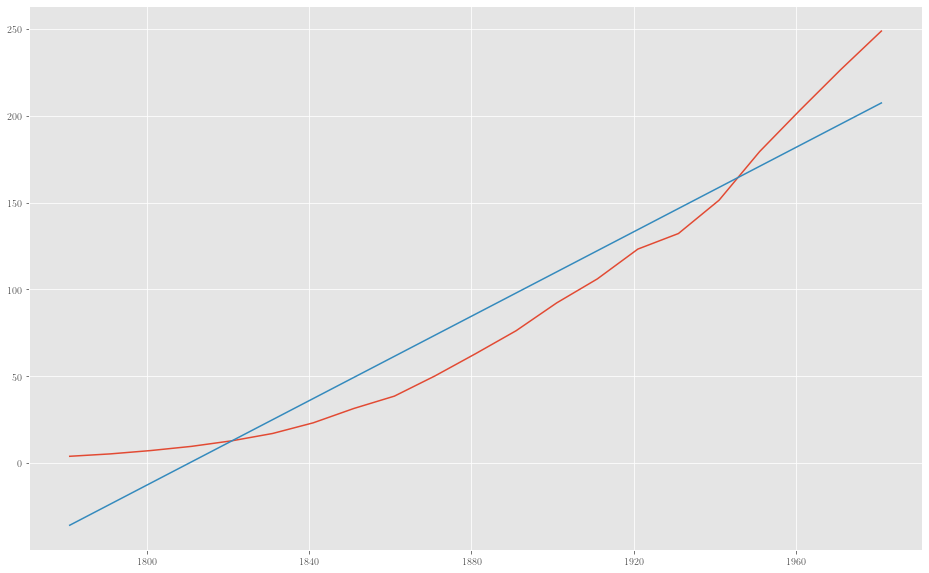

In [8]:
#Use the estimated model to predict the US population. Plot the prediction into the original plot.
prediction=result.predict(X)
fig, ax=plt.subplots(figsize=(16,10))
plt.plot(ts['date'],ts['pop'])
plt.plot(ts['date'],prediction)

## Linear Trend with logarithmized data

TBC